# Sensitivity of hydrological length scale

## Relative errors mean annual fluxes

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<Figure size 1280x400 with 0 Axes>

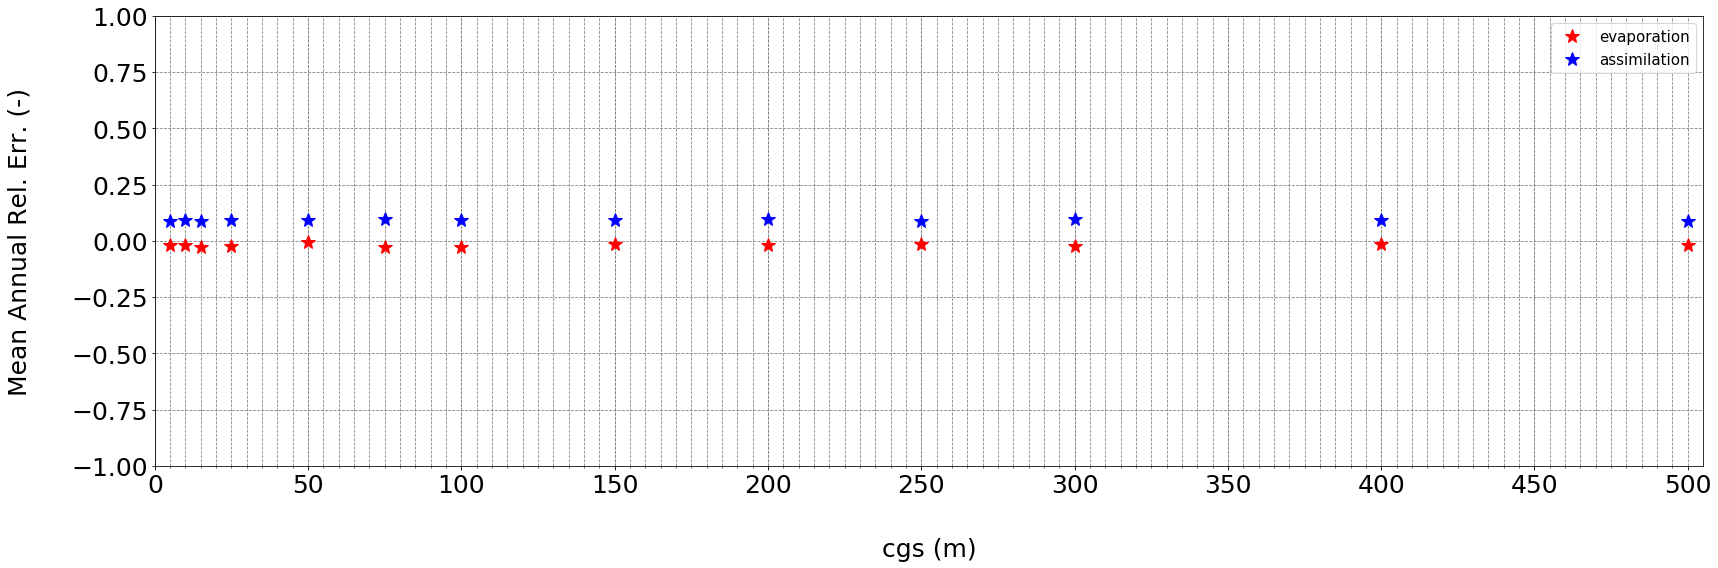

Missing files:  87


In [2]:
#load data
vals = np.arange(5, 505, 5)
#labels = ''.join(str(e) for e in vals)
#labels = map(str, np.round(vals,2) ) 
labels = map("{:.0f}".format, vals)
labels = list(labels)

#format(value, '.2f')

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(24, 8), sharex=True, sharey=True)   

i = 0
skipped = 0


loc = 1
#loop over all cpcff-values for the free-draining case
for label in labels:   

    try:
        ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
          label + "/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
          label + "/sce_stats_best/ass_beststats.txt") #mm/d       

        if(i == 0):
            box1 = ax.plot(vals[i], ebest_stats[1], '*r', markersize=15, label="evaporation" ) 
            ax.plot(vals[i], assbest_stats[1], '*b', markersize=15, label="assimilation" ) 
        else:
            box1 = ax.plot(vals[i], ebest_stats[1], '*r', markersize=15 ) 
            ax.plot(vals[i], assbest_stats[1], '*b', markersize=15 ) 

    except IOError:
        skipped = skipped + 1 
        #print("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
        #  label + "/sce_stats_best/ass_beststats.txt')")
    i = i + 1


ax.set_ylim([-1, 1])    
ax.set_xlim([0, 505])    
ax.grid(b=True, which='both', color='grey', axis="both", linestyle='--')

ax.set_xticks( np.arange(0,550, 50)  )  
ax.set_xticks( np.arange(0,500, 5), minor=True )  

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
plt.xlabel("cgs (m)", size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (-)', size = 25, labelpad=40)

plt.legend(prop={'size': 15})
plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The differences between different parameterizations of the length scale cgs alone, does not lead to large difference for the mean annual values of assimilation and evaporation.

## Timeseries of evaporation


/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


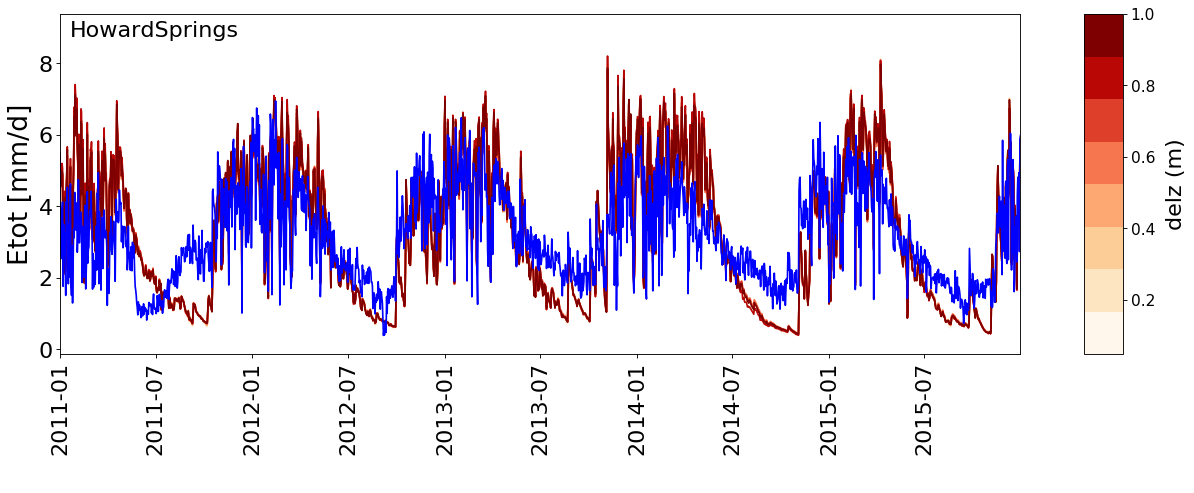

In [3]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_???/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar \
True --cbar_max 1.0 --cbar_min 0.05 --cblabel "delz (m)" --labels VOM VOM2 \
--title "HowardSprings"


Also the timeseries of evaporation do not show large differences when only the length scale parameter is adjusted.

## Timeseries of assimilation


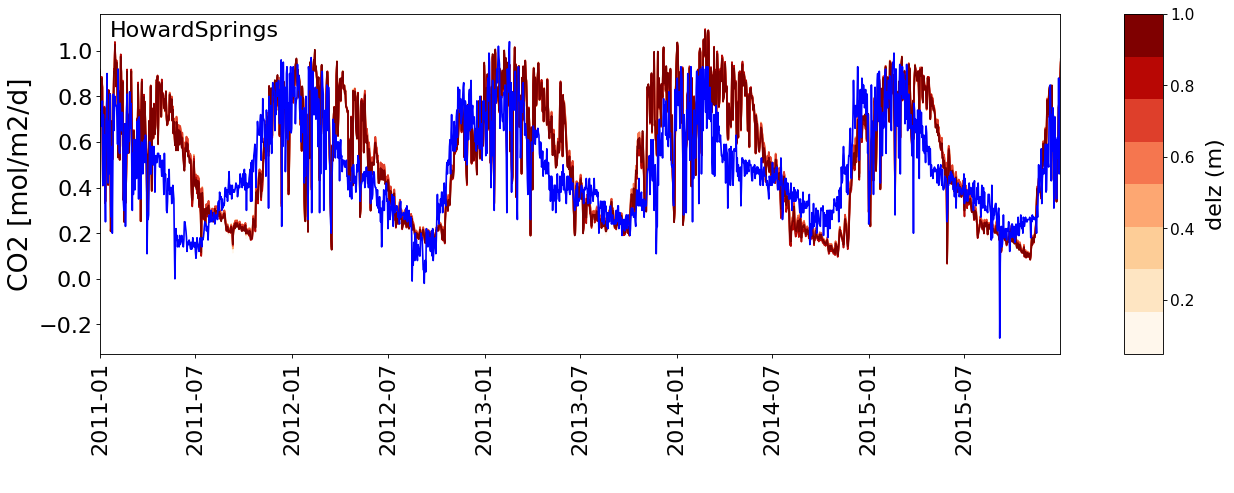

In [4]:

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_???/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cbar_max 1.0 --cbar_min 0.05 --cblabel "delz (m)" --labels VOM VOM2 \
--title "HowardSprings"


The timeseries of total assimilation do not show large differences between different values of the length scale cgs (colored from light yellow to darkred) with the observations (blue). 